In [62]:
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import plotly.io as pio
pio.templates.default = "plotly_dark"
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold,train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix,f1_score,roc_auc_score,roc_curve,accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import plotly.figure_factory as ff 
from sklearn.preprocessing import LabelEncoder
from sklearn import svm
from sklearn.utils import shuffle
from sklearn.model_selection import cross_val_score

In [4]:
df = pd.read_csv("card.csv", header=[1])
df.rename(columns={'default payment next month': 'target'}, inplace=True)
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,target
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [5]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,target
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [6]:
#Check missing data
total = df.isnull().sum().sort_values(ascending = False)
percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent']).transpose()

,target,PAY_6,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,BILL_AMT1,PAY_AMT6,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,ID
Total,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


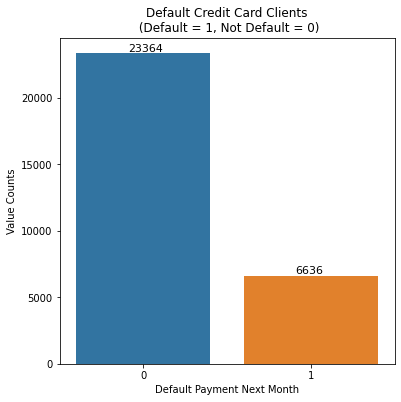

In [7]:
values = df['target'].value_counts()
plt.figure(figsize = (6,6))
plt.title('Default Credit Card Clients\n (Default = 1, Not Default = 0)')
sns.barplot(x = values.index, y = values.values)
for i, v in enumerate(values.values):
    plt.text(i-.09 , v + 150, str(v),fontsize=11)
plt.xlabel('Default Payment Next Month')
plt.ylabel('Value Counts')
plt.show()

In [8]:
marriage_count = df['MARRIAGE'].value_counts().reset_index().rename(columns={'index':'index','MARRIAGE':'count'})
marriage_count['index'][0] = 'Single'
marriage_count['index'][1] = 'Married'
marriage_count['index'][2] = 'Others'
marriage_count['index'][3] = 'Unknown'
fig = go.Figure(go.Bar(
    x = marriage_count['index'],y = marriage_count['count'],text=marriage_count['count'],marker={'color': marriage_count['count']}
    ,textposition = "outside"))
fig.update_layout(title_text='Count plot of marriage',xaxis_title="Marriage status",yaxis_title="Number of count")
fig.show()

In [9]:
edu_count = df['EDUCATION'].value_counts().reset_index().rename(columns={'index':'index','EDUCATION':'count'})
edu_count['index'][0] = 'University'
edu_count['index'][1] = 'Graduate School'
edu_count['index'][2] = 'High school'
edu_count['index'][3] = 'Unknown 1'
edu_count['index'][4] = 'Others'
edu_count['index'][5] = 'Unknown 2'
edu_count['index'][6] = 'Unknown 3'
fig = go.Figure(go.Bar(
    x = edu_count['index'],y = edu_count['count'],text = edu_count['count'],marker={'color': edu_count['count']}
    ,textposition = "outside"))
fig.update_layout(title_text='Count plot of education',xaxis_title="Education status",yaxis_title="Number of count")
fig.show()

In [10]:
sex_count = df['SEX'].value_counts().reset_index().rename(columns={'index':'index','SEX':'count'})
sex_count['index'][1] = 'Male'
sex_count['index'][0] = 'Female'
fig = go.Figure(go.Bar(
    x = sex_count['index'],y = sex_count['count'],text=sex_count['count'],marker={'color': sex_count['count']}
    ,textposition = "outside"))
fig.update_layout(title_text='Count plot of gender',xaxis_title="Gender",yaxis_title="Number of count")
fig.show()

In [11]:

from plotly.graph_objs import *
bills = df[['BILL_AMT1','BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']]
fig = make_subplots(rows= 3, cols=2,subplot_titles=bills.columns.to_list())  


fig.add_trace(go.Histogram(x= df["BILL_AMT1"],name='BILL_AMT1'),row = 1, col = 1)
fig.add_trace(go.Histogram(x= df["BILL_AMT2"],name='BILL_AMT2'),row = 2, col = 2)
fig.add_trace(go.Histogram(x= df["BILL_AMT3"],name='BILL_AMT3'),row = 3, col = 1)
fig.add_trace(go.Histogram(x= df["BILL_AMT4"],name='BILL_AMT4'),row = 1, col = 2)
fig.add_trace(go.Histogram(x= df["BILL_AMT5"],name='BILL_AMT5'),row = 2, col = 1)
fig.add_trace(go.Histogram(x= df["BILL_AMT6"],name='BILL_AMT6'),row = 3, col = 2)


fig.update_layout(height=600, width=800, title_text="Histogram Subplots of Bill Amount")
fig.show()

Bills are highly right skewed, so transformation might be required

In [16]:
pay = df[['PAY_AMT1','PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']]
fig = make_subplots(rows= 3, cols=2,subplot_titles=pay.columns.to_list())  

fig.add_trace(go.Histogram(x= df["PAY_AMT1"],name='PAY_AMT1'),row = 1, col = 1)
fig.add_trace(go.Histogram(x= df["PAY_AMT2"],name='PAY_AMT2'),row = 2, col = 2)
fig.add_trace(go.Histogram(x= df["PAY_AMT3"],name='PAY_AMT3'),row = 3, col = 1)
fig.add_trace(go.Histogram(x= df["PAY_AMT4"],name='PAY_AMT4'),row = 1, col = 2)
fig.add_trace(go.Histogram(x= df["PAY_AMT5"],name='PAY_AMT5'),row = 2, col = 1)
fig.add_trace(go.Histogram(x= df["PAY_AMT6"],name='PAY_AMT6'),row = 3, col = 2)


fig.update_layout(height=600, width=800, title_text="Histogram Subplots of Amount of Previous Payment")
fig.show()

Previous pay amounts are highly right skewed, so transformation might be required

In [13]:
pay_s = df[['PAY_0','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']]
df['PAY_0'].value_counts().index.to_list().sort()
fig = make_subplots(rows= 3, cols=2,subplot_titles=pay_s.columns.to_list())  

fig.add_trace(go.Histogram(x= df["PAY_0"],name='PAY_0'),row = 1, col = 1)
fig.add_trace(go.Histogram(x= df["PAY_2"],name='PAY_2'),row = 2, col = 2)
fig.add_trace(go.Histogram(x= df["PAY_3"],name='PAY_3'),row = 3, col = 1)
fig.add_trace(go.Histogram(x= df["PAY_4"],name='PAY_4'),row = 1, col = 2)
fig.add_trace(go.Histogram(x= df["PAY_5"],name='PAY_5'),row = 2, col = 1)
fig.add_trace(go.Histogram(x= df["PAY_6"],name='PAY_6'),row = 3, col = 2)


fig.update_layout(bargap=0.2,height=600, width=800, title_text="Histogram Subplots of Previous Payment Status")
fig.show()

Most of the customers pay duly

In [14]:
fig =  go.Figure(data=[go.Histogram(x= df["AGE"])])
fig.show()

Most of the customers are age 20-30 and is decreasing after 30

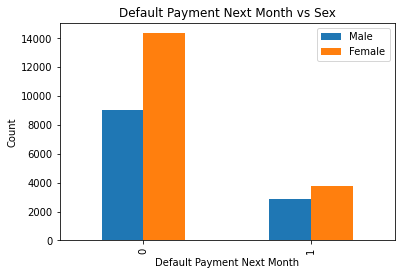

In [15]:
pd.crosstab(df['target'],df['SEX']).plot(kind='bar')
plt.title('Default Payment Next Month vs Sex')
plt.xlabel('Default Payment Next Month')
plt.ylabel('Count')
plt.legend(['Male', 'Female'])
plt.show()

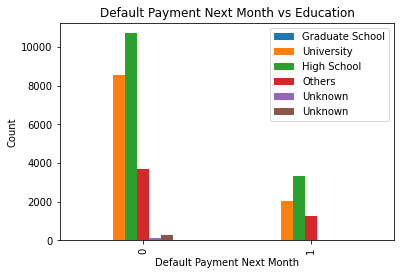

In [17]:
pd.crosstab(df['target'],df['EDUCATION']).plot(kind='bar')
plt.title('Default Payment Next Month vs Education')
plt.xlabel('Default Payment Next Month')
plt.ylabel('Count')
plt.legend(['Graduate School', 'University', 'High School', 'Others', 'Unknown', 'Unknown'])
plt.show()

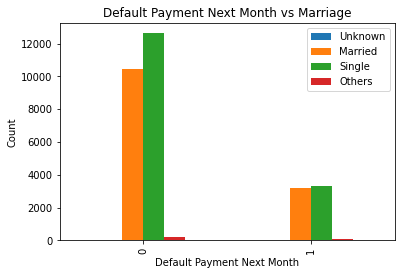

In [18]:
pd.crosstab(df['target'],df['MARRIAGE']).plot(kind='bar')
plt.title('Default Payment Next Month vs Marriage')
plt.xlabel('Default Payment Next Month')
plt.ylabel('Count')
plt.legend(['Unknown', 'Married', 'Single', 'Others'])
plt.show()

In [19]:
#Credit Limit density plot
fig =  go.Figure(data=[go.Histogram(x= df["LIMIT_BAL"])])
fig.show()

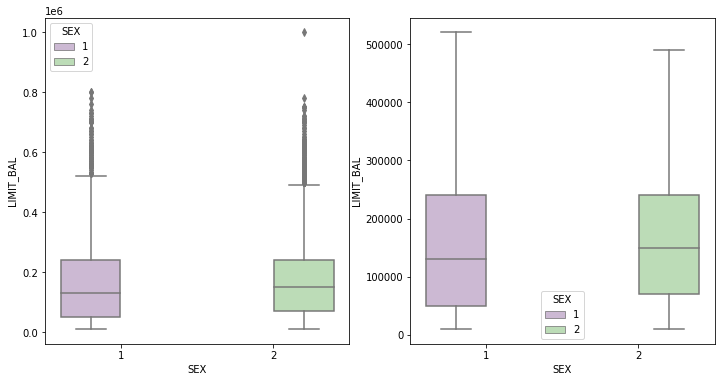

In [21]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
s1 = sns.boxplot(ax = ax1, x="SEX", y="LIMIT_BAL", hue="SEX",data=df, palette="PRGn",showfliers=True)
s2 = sns.boxplot(ax = ax2, x="SEX", y="LIMIT_BAL", hue="SEX",data=df, palette="PRGn",showfliers=False)
plt.show();

The value of upper whisker is  520000.0


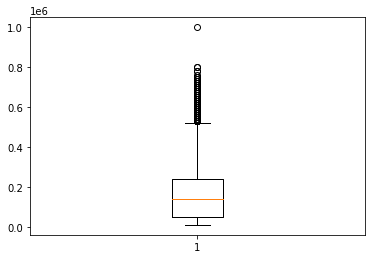

In [31]:
box = plt.boxplot(x="LIMIT_BAL",data=df)
upper_whisker = [item.get_ydata() for item in box['whiskers']][1][1]
print("The value of upper whisker is ", upper_whisker)

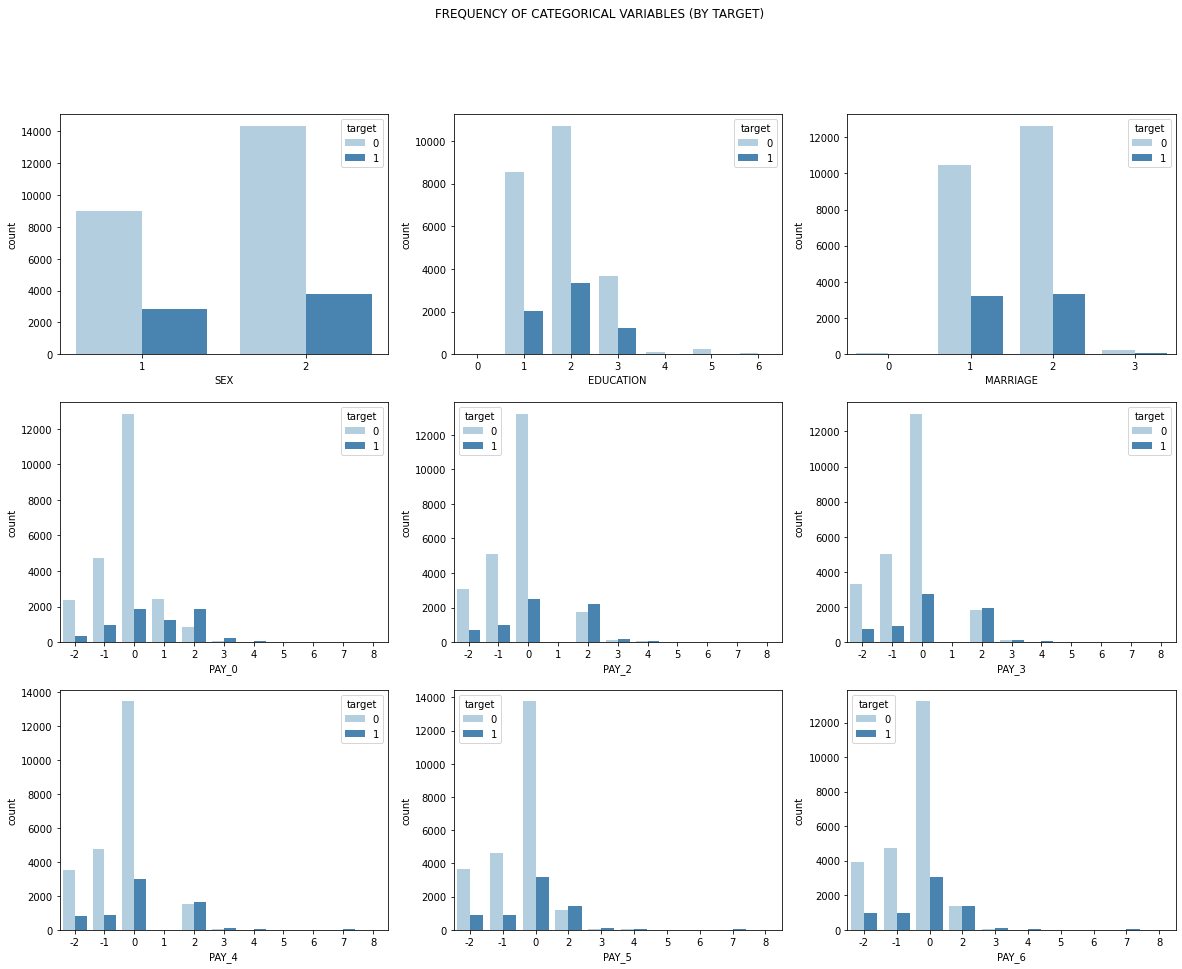

In [32]:
# Creating a new dataframe with categorical variables
subset = df[['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 
               'PAY_5', 'PAY_6', 'target']]

f, axes = plt.subplots(3, 3, figsize=(20, 15), facecolor='white')
f.suptitle('FREQUENCY OF CATEGORICAL VARIABLES (BY TARGET)')
ax1 = sns.countplot(x="SEX", hue="target", data=subset, palette="Blues", ax=axes[0,0])
ax2 = sns.countplot(x="EDUCATION", hue="target", data=subset, palette="Blues",ax=axes[0,1])
ax3 = sns.countplot(x="MARRIAGE", hue="target", data=subset, palette="Blues",ax=axes[0,2])
ax4 = sns.countplot(x="PAY_0", hue="target", data=subset, palette="Blues", ax=axes[1,0])
ax5 = sns.countplot(x="PAY_2", hue="target", data=subset, palette="Blues", ax=axes[1,1])
ax6 = sns.countplot(x="PAY_3", hue="target", data=subset, palette="Blues", ax=axes[1,2])
ax7 = sns.countplot(x="PAY_4", hue="target", data=subset, palette="Blues", ax=axes[2,0])
ax8 = sns.countplot(x="PAY_5", hue="target", data=subset, palette="Blues", ax=axes[2,1])
ax9 = sns.countplot(x="PAY_6", hue="target", data=subset, palette="Blues", ax=axes[2,2])

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray



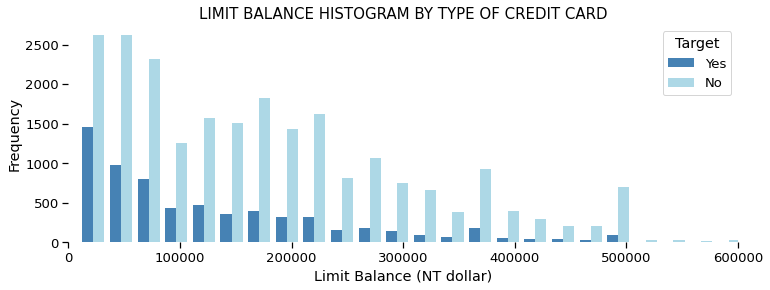

In [33]:
x1 = list(df[df['target'] == 1]['LIMIT_BAL'])
x2 = list(df[df['target'] == 0]['LIMIT_BAL'])

plt.figure(figsize=(12,4))
sns.set_context('notebook', font_scale=1.2)
#sns.set_color_codes("pastel")
plt.hist([x1, x2], bins = 40, density=False, color=['steelblue', 'lightblue'])
plt.xlim([0,600000])
plt.legend(['Yes', 'No'], title = 'Target', loc='upper right', facecolor='white')
plt.xlabel('Limit Balance (NT dollar)')
plt.ylabel('Frequency')
plt.title('LIMIT BALANCE HISTOGRAM BY TYPE OF CREDIT CARD', SIZE=15)
plt.box(False)
plt.savefig('ImageName', format='png', dpi=200, transparent=True);

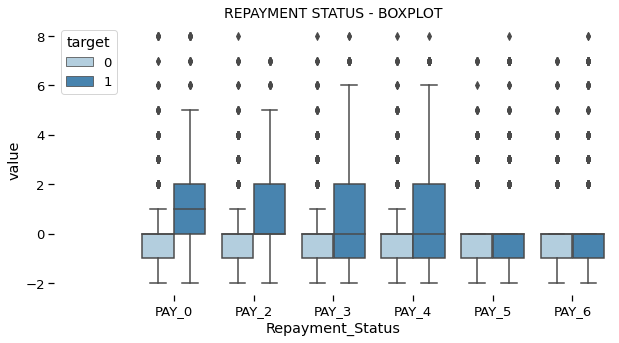

In [34]:
Repayment = df[['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']]
y = df.target
Repayment = pd.concat([y,Repayment],axis=1)
Repayment = pd.melt(Repayment,id_vars="target",
                    var_name="Repayment_Status",
                    value_name='value')

plt.figure(figsize=(10,5))
sns.set_context('notebook', font_scale=1.2)
sns.boxplot(y="value", x="Repayment_Status", hue="target", data=Repayment, palette='Blues')
plt.legend(loc='best', title= 'target', facecolor='white')
plt.xlim([-1.5,5.5])
plt.title('REPAYMENT STATUS - BOXPLOT', size=14)
plt.box(False)
plt.savefig('ImageName', format='png', dpi=200);

DATA CLEANING AND FURTHER EXPLORATORY

In [35]:
#Change the 0 in marriage to become 3 as they can be categorized as the 'Other'
df.loc[df.MARRIAGE == 0, 'MARRIAGE'] = 3
df.MARRIAGE.value_counts()

2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64

In [36]:
#The 0 (undocumented), 5 and 6 (unknown) in EDUCATION can be put in a 'Other' category
fil = (df.EDUCATION == 5) | (df.EDUCATION == 6) | (df.EDUCATION == 0)
df.loc[fil, 'EDUCATION'] = 4
df.EDUCATION.value_counts()

2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64

In [37]:
#function to draw multiple histograms
def draw_histograms(df, variables, n_rows, n_cols, n_bins):
    fig=plt.figure()
    for i, var_name in enumerate(variables):
        ax=fig.add_subplot(n_rows,n_cols,i+1)
        df[var_name].hist(bins=n_bins,ax=ax)
        ax.set_title(var_name)
    fig.tight_layout()  # Improves appearance a bit.
    plt.show()

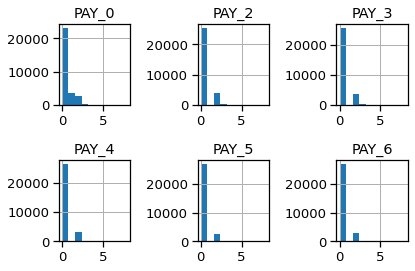

In [38]:
#-1 and -2 values in PAY_n can be combined together into 0
fil = (df.PAY_0 == -2) | (df.PAY_0 == -1) | (df.PAY_0 == 0)
df.loc[fil, 'PAY_0'] = 0
fil = (df.PAY_2 == -2) | (df.PAY_2 == -1) | (df.PAY_2 == 0)
df.loc[fil, 'PAY_2'] = 0
fil = (df.PAY_3 == -2) | (df.PAY_3 == -1) | (df.PAY_3 == 0)
df.loc[fil, 'PAY_3'] = 0
fil = (df.PAY_4 == -2) | (df.PAY_4 == -1) | (df.PAY_4 == 0)
df.loc[fil, 'PAY_4'] = 0
fil = (df.PAY_5 == -2) | (df.PAY_5 == -1) | (df.PAY_5 == 0)
df.loc[fil, 'PAY_5'] = 0
fil = (df.PAY_6 == -2) | (df.PAY_6 == -1) | (df.PAY_6 == 0)
df.loc[fil, 'PAY_6'] = 0
late = df[['PAY_0','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']]
draw_histograms(late, late.columns, 2, 3, 10)

In [39]:
#remove outliers from limit_balance
df = df[df.LIMIT_BAL <= upper_whisker]

BIVARIATE ANALYSIS

In [40]:
def cross(Col1, Col2):
    res = pd.crosstab(df[Col1], df[Col2])
    #Calculating the percentage of defaulters
    res['Percentage'] = round((res[res.columns[1]]/(res[res.columns[0]] + res[res.columns[1]])) * 100,2)
    print(res)
    #Plotting a stack bar graph
    fig = go.Figure(data=[
    go.Bar(name='Non-Defaulters', x=res.index.to_list(),y=res[0]),
    go.Bar(name='Defaulters', x=res.index.to_list(), y=res[1],text=(res['Percentage']),textposition = "outside")])
    # Change the bar mode to stack
    fig.update_layout(barmode='stack',title_text = res.index.name + " variable v/s target" ,xaxis_title=res.index.name,yaxis_title="Number of count")
    fig.show()

GENDER VS TARGET

In [41]:
cross("SEX","target")

target      0     1  Percentage
SEX                            
1        8947  2866       24.26
2       14269  3751       20.82


EDUCATION VS TARGET

In [42]:
cross("EDUCATION","target")

target         0     1  Percentage
EDUCATION                         
1           8464  2029       19.34
2          10656  3320       23.76
3           3664  1236       25.22
4            432    32        6.90


MARRIAGE VS TARGET

In [43]:
cross("MARRIAGE","target")

target        0     1  Percentage
MARRIAGE                         
1         10387  3190       23.50
2         12541  3338       21.02
3           288    89       23.61


Age Distribution of Target

In [44]:
fig = go.Figure()
fig.add_trace(go.Histogram(x = df[df['target'] == 0]["AGE"],marker_color="green",name="Non-defaulters"))
fig.add_trace(go.Histogram(x = df[df['target'] == 1]["AGE"],marker_color="orange",name="Defaulters"))
# Overlay both histograms
fig.update_layout(barmode='overlay')
# Reduce opacity to see both histograms
fig.update_traces(opacity=0.75)
fig.update_layout(title="Distribution of age of defaulters and non-defaulters",xaxis_title="Percentage",yaxis_title="Counts")
fig.show()

FEATURE SELECTION

In [45]:
df.corr()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,target
ID,1.000000,0.026021,0.018981,0.037160,-0.028509,0.018487,-0.020972,-0.009897,-0.019121,0.013880,-0.019943,-0.032196,0.018979,0.017906,0.023947,0.040475,0.015795,0.016664,0.008799,0.008896,0.042947,0.005528,0.000877,0.001998,-0.013832
LIMIT_BAL,0.026021,1.000000,0.027927,-0.233723,-0.113253,0.141665,-0.171945,-0.199297,-0.193441,-0.181804,-0.171885,-0.169028,0.268435,0.261914,0.267146,0.277944,0.279822,0.272889,0.191468,0.176195,0.205008,0.199211,0.206338,0.213436,-0.154011
SEX,0.018981,0.027927,1.000000,0.013060,-0.029284,-0.090376,-0.034698,-0.044827,-0.040983,-0.039782,-0.038488,-0.031932,-0.033499,-0.031240,-0.024093,-0.022063,-0.016632,-0.016126,0.000024,-0.001624,-0.010326,-0.000509,-0.001820,-0.002987,-0.040561
EDUCATION,0.037160,-0.233723,0.013060,1.000000,-0.136742,0.183001,0.055376,0.062331,0.052703,0.050650,0.039128,0.027642,0.019125,0.014562,0.009252,-0.003200,-0.010045,-0.010039,-0.039622,-0.031869,-0.045356,-0.041485,-0.045856,-0.044667,0.033146
MARRIAGE,-0.028509,-0.113253,-0.029284,-0.136742,1.000000,-0.411714,-0.011245,-0.008946,0.002577,-0.002962,-0.002526,0.003040,-0.026163,-0.023685,-0.027931,-0.026057,-0.027842,-0.023648,-0.005021,-0.009621,-0.002915,-0.013128,-0.004076,-0.008315,-0.026799
AGE,0.018487,0.141665,-0.090376,0.183001,-0.411714,1.000000,-0.001167,-0.008682,-0.014280,-0.007118,-0.013329,-0.017385,0.051865,0.049975,0.049537,0.047068,0.045146,0.043024,0.025508,0.021245,0.024717,0.019854,0.022124,0.018434,0.014440
PAY_0,-0.020972,-0.171945,-0.034698,0.055376,-0.011245,-0.001167,1.000000,0.698167,0.516864,0.460193,0.424503,0.373577,0.000225,0.010170,0.014145,0.022972,0.031285,0.031687,-0.079772,-0.057392,-0.065723,-0.062286,-0.054498,-0.048509,0.395832
PAY_2,-0.009897,-0.199297,-0.044827,0.062331,-0.008946,-0.008682,0.698167,1.000000,0.663502,0.512687,0.462785,0.406927,0.012511,0.016621,0.023743,0.033427,0.041087,0.043303,-0.097822,-0.054497,-0.062416,-0.054295,-0.048447,-0.042386,0.326927
PAY_3,-0.019121,-0.193441,-0.040983,0.052703,0.002577,-0.014280,0.516864,0.663502,1.000000,0.678813,0.551481,0.492559,-0.020371,-0.000432,0.003082,0.017425,0.026935,0.030176,-0.040784,-0.073321,-0.061718,-0.055517,-0.052163,-0.048936,0.287330
PAY_4,0.013880,-0.181804,-0.039782,0.050650,-0.002962,-0.007118,0.460193,0.512687,0.678813,1.000000,0.745494,0.602785,-0.023867,-0.011048,0.004642,0.016986,0.029522,0.036004,-0.054279,-0.036377,-0.077698,-0.055567,-0.052842,-0.048218,0.269477


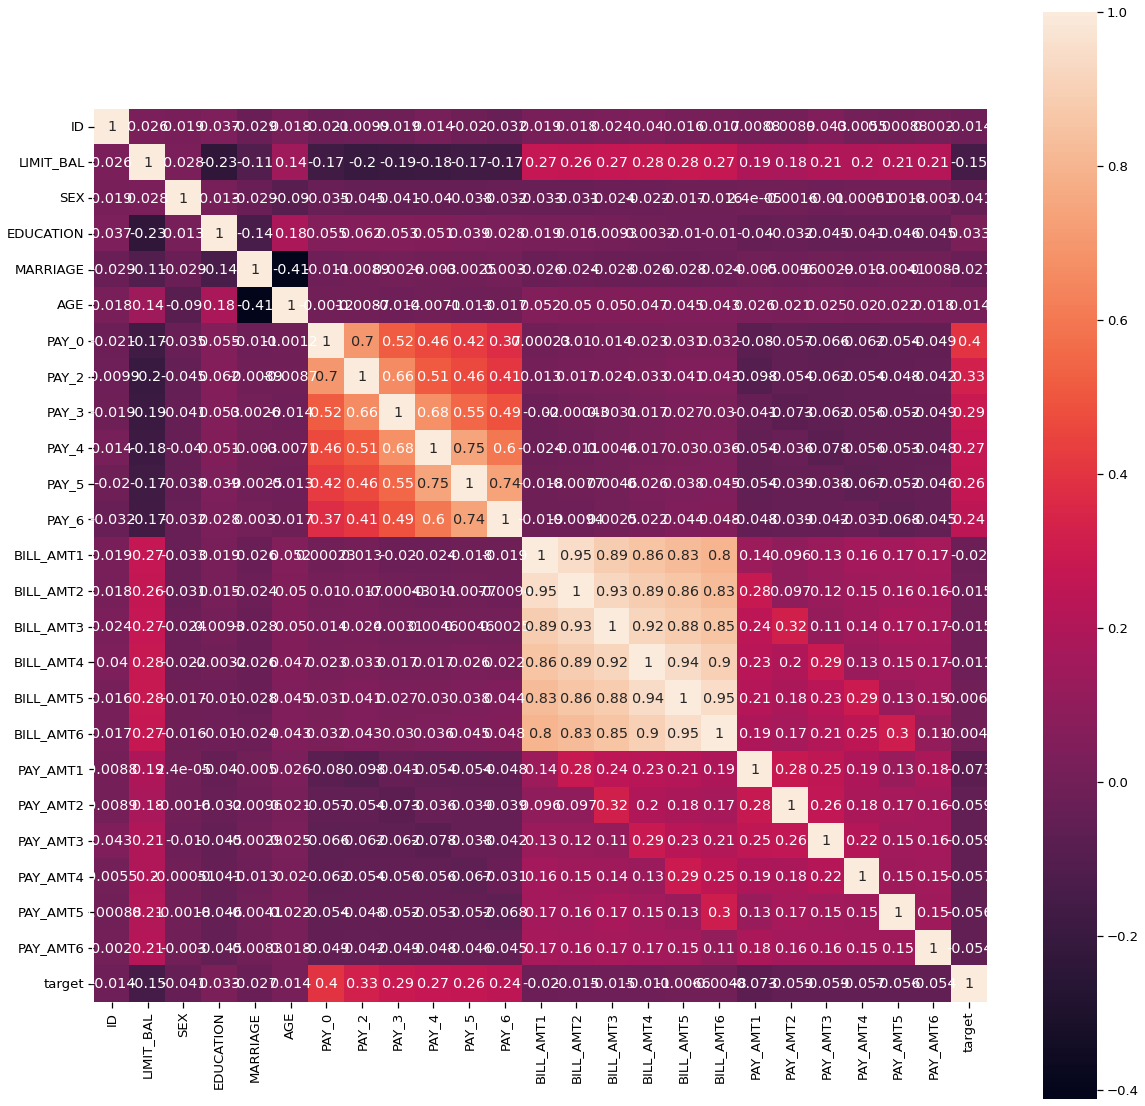

In [46]:
plt.figure(figsize = (20,20))
sns.heatmap(df.corr(),annot = True,square = True)

In [47]:
features = ['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

df_new = df.copy()
df_new = df_new.drop(['ID'], axis=1)
df_new[['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'SEX','MARRIAGE','EDUCATION']] = df[['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'SEX','MARRIAGE','EDUCATION']].astype('object')
df_new = pd.get_dummies(df_new, drop_first = True)
df_new.head()

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,target,SEX_2,EDUCATION_2,EDUCATION_3,EDUCATION_4,MARRIAGE_2,MARRIAGE_3,PAY_0_1,PAY_0_2,PAY_0_3,PAY_0_4,PAY_0_5,PAY_0_6,PAY_0_7,PAY_0_8,PAY_2_1,PAY_2_2,PAY_2_3,PAY_2_4,PAY_2_5,PAY_2_6,PAY_2_7,PAY_2_8,PAY_3_1,PAY_3_2,PAY_3_3,PAY_3_4,PAY_3_5,PAY_3_6,PAY_3_7,PAY_3_8,PAY_4_1,PAY_4_2,PAY_4_3,PAY_4_4,PAY_4_5,PAY_4_6,PAY_4_7,PAY_4_8,PAY_5_2,PAY_5_3,PAY_5_4,PAY_5_5,PAY_5_6,PAY_5_7,PAY_5_8,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7,PAY_6_8
0,20000,24,3913,3102,689,0,0,0,0,689,0,0,0,0,1,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,120000,26,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,90000,34,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,50000,37,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,50000,57,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [61]:
X = df_new.drop(['target'], axis = 1)
y = df_new['target']

X_shuffle, y_shuffle = shuffle(X, y, random_state=42)

Tree Classifier Using Decision Tree Classifier



In [65]:
values = df['target'].value_counts()
classifier = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=20,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=20,
            min_weight_fraction_leaf=0.0, random_state=None,
            splitter='best')
scores = cross_val_score(classifier, X_shuffle, y_shuffle, cv=5)
print("%0.5f accuracy with a standard deviation of %0.5f" % (scores.mean(), scores.std()))

0.81698 accuracy with a standard deviation of 0.00201


RANDOM FORREST CLASSIFIER

In [67]:
clf = RandomForestClassifier()
scores = cross_val_score(clf, X_shuffle, y_shuffle, cv=5)
print("%0.5f accuracy with a standard deviation of %0.5f" % (scores.mean(), scores.std()))

0.81644 accuracy with a standard deviation of 0.00251


LOGISTICS REGRESSION

In [70]:
ss = StandardScaler()

logreg = LogisticRegression()
X_scaled = ss.fit_transform(X_shuffle)
scores = cross_val_score(logreg, X_scaled, y_shuffle, cv=5)
print("%0.5f accuracy with a standard deviation of %0.5f" % (scores.mean(), scores.std()))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



0.81876 accuracy with a standard deviation of 0.00204


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



NAIVE BAYES

In [71]:
nb = GaussianNB()
scores = cross_val_score(nb, X_scaled, y_shuffle, cv=5)
print("%0.5f accuracy with a standard deviation of %0.5f" % (scores.mean(), scores.std()))

0.79154 accuracy with a standard deviation of 0.00832
